In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_excel('/Volumes/Project/Ai project/machine learning/IIT BOMBAY/welding /weld.xlsx')
df.head(10)

,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
0,0,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.200,No Defect
1,1,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0.00,29.3,0.000,Tungsten Inclusion
2,2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0.00,29.3,0.000,No Defect
3,3,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0.00,29.3,0.000,No Defect
4,4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0.00,27.8,0.000,No Defect
5,5,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:286,0.24,74,23,0.00,27.8,0.000,No Defect
6,6,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:786,-0.90,74,23,0.00,27.8,0.000,No Defect
7,7,382617,TWLD23,E15002965,240,10-09-2022,7:32:32:390,2.61,74,23,0.00,28.0,0.000,No Defect
8,8,382617,TWLD23,E15002965,240,10-09-2022,7:32:27:884,10.51,74,23,0.00,28.0,9.062,No Defect
9,9,382617,TWLD23,E15002965,240,10-09-2022,7:32:32:949,2.35,74,23,0.00,28.0,0.000,No Defect


In [51]:
df.describe()

,Unnamed: 0,Employee Code,Current,Humidity,Temperature,Flow,Job Temp,Voltage
count,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000,827534.000000
mean,413766.500000,318584.042989,8.673877,74.956373,23.884997,1.763230,136.406572,2.846528
std,238888.633169,139094.397126,13.219339,10.374707,3.491204,1.741196,558.122529,4.616725
min,0.000000,0.000000,-2.000000,0.000000,-13.000000,0.000000,0.000000,-2.578000
25%,206883.250000,382617.000000,0.260000,72.000000,24.000000,0.000000,29.800000,0.000000
50%,413766.500000,391342.000000,2.250000,76.000000,24.000000,1.600000,31.300000,0.000000
75%,620649.750000,394269.000000,13.677500,79.000000,25.000000,3.140000,35.600000,8.660000
max,827533.000000,394965.000000,163.000000,2444.000000,828.000000,14.470000,3276.700000,24.499000


In [74]:
# Create new variable to store the value in the dataset
upd_df = df.drop(["Unnamed: 0",	"Employee Code",	"Machine",	"Production",	"Order Operation No",	"Date"	,"Time"],axis=1)


In [75]:
#Encoding the target variable
enc = LabelEncoder()

upd_df["Defect"] = enc.fit_transform(upd_df["Defect"])

# Data Vizulaization

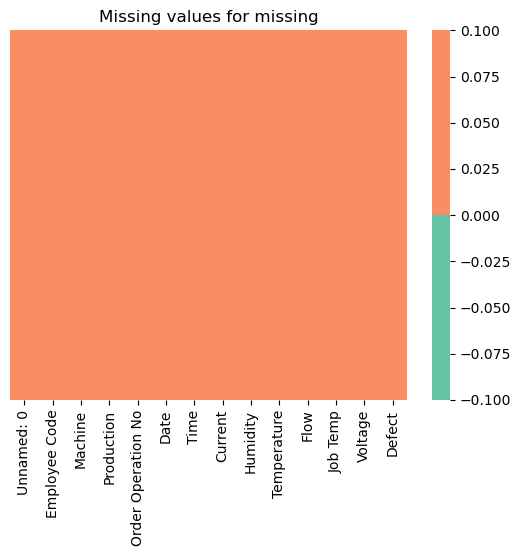

In [6]:
# Vizualize the missing values
import seaborn as sns
sns.heatmap(df.isnull(),
            cmap=sns.color_palette('Set2',2),
            xticklabels=[f'{col}' for col in df.columns],
            yticklabels=False
            ).set_title('Missing values for missing');

/var/folders/0k/ldt1yyd108l2jv3rbg5bmtvc0000gn/T/ipykernel_15727/1026132119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

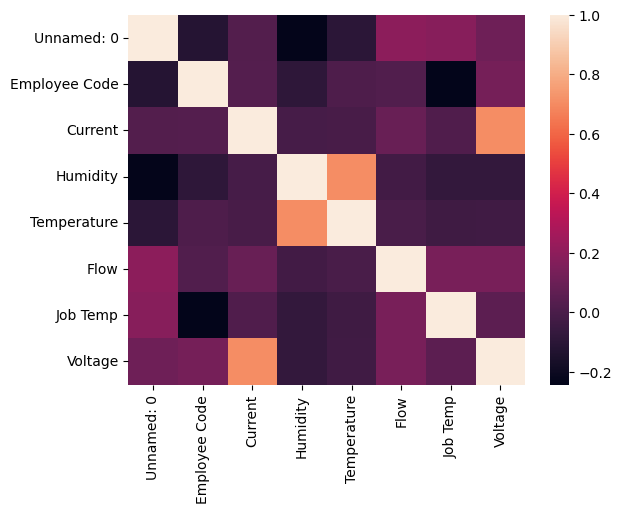

In [7]:
# heatmap
sns.heatmap(df.corr())

Text(0, 0.5, 'Voltage')

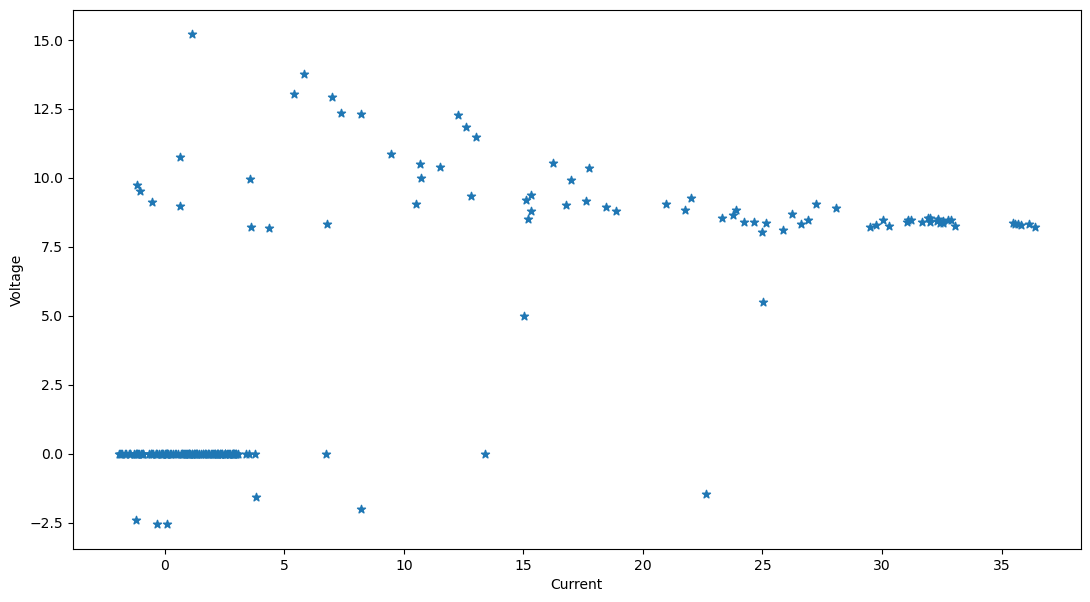

In [8]:
# vizualize the current and voltage
plt.figure(figsize=(13,7))
plt.scatter(df.Current.head(200),df.Voltage.head(200),marker='*')
plt.xlabel('Current')
plt.ylabel('Voltage')

# Feature Selection

In [9]:

feature_selec_data_point = df.drop(["Time","Date","Machine","Production"],axis=1)
feature_selec_data_point.head(5)

,Unnamed: 0,Employee Code,Order Operation No,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
0,0,382617,240,1.13,74,23,0.01,29.3,15.2,No Defect
1,1,382617,240,1.82,74,23,0.00,29.3,0.0,Tungsten Inclusion
2,2,382617,240,2.91,74,23,0.00,29.3,0.0,No Defect
3,3,382617,240,0.04,74,23,0.00,29.3,0.0,No Defect
4,4,382617,240,2.51,74,23,0.00,27.8,0.0,No Defect


In [10]:
# Converting categorical data into numerical data
enc = LabelEncoder()
# feature_selec_data_point.drop("Unnamed:0")
feature_selec_data_point.head(5)
feature_selec_data_point["Defect"] = enc.fit_transform(feature_selec_data_point["Defect"])
feature_selec_data_point

,Unnamed: 0,Employee Code,Order Operation No,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
0,0,382617,240,1.13,74,23,0.01,29.3,15.2,0
1,1,382617,240,1.82,74,23,0.00,29.3,0.0,2
2,2,382617,240,2.91,74,23,0.00,29.3,0.0,0
3,3,382617,240,0.04,74,23,0.00,29.3,0.0,0
4,4,382617,240,2.51,74,23,0.00,27.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...
827529,827529,391342,240,0.33,58,24,0.00,34.0,0.0,0
827530,827530,391342,240,0.34,58,24,0.00,34.0,0.0,0
827531,827531,391342,240,-0.86,58,24,0.06,34.0,0.0,0
827532,827532,391342,240,0.32,58,24,0.00,34.6,0.0,0


In [11]:
feature_selec_data_point.dtypes
feature_selec_data_point.drop(["Unnamed: 0","Employee Code","Order Operation No"],axis=1,inplace=True)

In [12]:
print(__doc__)
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X=np.array(feature_selec_data_point.drop('Defect',axis=1))
y=np.array(feature_selec_data_point['Defect'])
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 5 (0.282699)
2. feature 0 (0.247847)
3. feature 4 (0.175634)
4. feature 3 (0.145142)
5. feature 1 (0.101949)
6. feature 2 (0.046730)


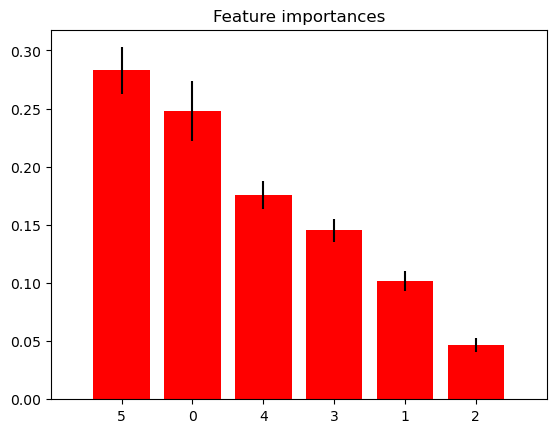

In [13]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

*** As we see from the above graoh voltage and current play curical role in the predicting the output columns .So going to remove outlier in voltage and current column ***

# Feature Enginerring

Removing Outlier in Voltage Column

In [14]:
# Using IQR remove outlier in voltage column

Q1 = upd_df['Voltage'].quantile(0.71) # 71 percentage because all before values are 0's
Q3 = upd_df['Voltage'].quantile(0.98)

#find the IQR
IOR = Q3-Q1

#Setting lower bound value and upper bound value

lower_limit = Q1 - 0*IOR
upper_limit = Q3 + 0*IOR

lower_limit , upper_limit

(1.108, 12.408)

In [15]:
#no outlier in voltage column
upd_no_outlier_voltage = upd_df[(upd_df['Voltage'] > lower_limit)&(upd_df['Voltage']< upper_limit)]

In [16]:
upd_no_outlier_voltage

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
8,10.51,74,23,0.0,28.0,9.062,0
20,9.44,74,23,0.0,28.2,10.852,0
21,10.73,74,23,0.0,28.1,9.994,0
22,12.82,74,23,0.0,28.1,9.354,0
23,15.32,74,23,0.0,28.1,9.361,0
...,...,...,...,...,...,...,...
827258,19.84,57,24,0.0,38.2,12.117,0
827259,20.53,57,24,0.0,409.3,11.969,0
827269,19.20,57,24,0.0,37.5,11.829,0
827290,5.90,57,24,0.0,37.1,6.926,0


In [17]:
# Using IQR remove outlier in current column

Q1 = upd_df['Current'].quantile(0.45) # 71 percentage because all before values are 0's
Q3 = upd_df['Current'].quantile(0.75)

#find the IQR
IOR = Q3-Q1

#Setting lower bound value and upper bound value

lower_limit = Q1 - 0.5*IOR
upper_limit = Q3 + 0.5*IOR

lower_limit , upper_limit,Q1,Q3
upd_no_outlier_curr = upd_no_outlier_voltage[(upd_no_outlier_voltage['Current'] > lower_limit)&(upd_no_outlier_voltage['Current']< upper_limit)]
upd_no_outlier_curr

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
8,10.51,74,23,0.0,28.0,9.062,0
20,9.44,74,23,0.0,28.2,10.852,0
21,10.73,74,23,0.0,28.1,9.994,0
22,12.82,74,23,0.0,28.1,9.354,0
23,15.32,74,23,0.0,28.1,9.361,0
...,...,...,...,...,...,...,...
827231,8.39,57,24,0.0,38.7,5.896,0
827234,7.15,57,24,0.0,38.4,11.919,0
827269,19.20,57,24,0.0,37.5,11.829,0
827290,5.90,57,24,0.0,37.1,6.926,0


In [18]:
upd_no_outlier_curr["Defect"].value_counts()

0    66060
2     1235
1       96
Name: Defect, dtype: int64

In [19]:

X = upd_no_outlier_curr.drop("Defect",axis=1)
y = upd_no_outlier_curr["Defect"]

#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()

[(0, 66060), (1, 66060), (2, 66060)]


0    66060
2    66060
1    66060
Name: Defect, dtype: int64

# Model Creation for without outlier and SMOTE applied

Algorithm used here is RandomForestClassifier

In [20]:
X_smote = equal_defect.drop("Defect",axis=1)
y_smote = equal_defect["Defect"]
print(y)

X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,train_size=0.7,random_state=252)

model1 = RandomForestClassifier()
model1.fit(X_train_smote,y_train_smote)
model1.score(X_train_smote,y_train_smote)

8         0
20        0
21        0
22        0
23        0
         ..
827231    0
827234    0
827269    0
827290    0
827294    0
Name: Defect, Length: 67391, dtype: int64


1.0

In [21]:
predict = model1.predict(X_test_smote)
confusion_matrix(y_test_smote,predict)

array([[19375,     4,   371],
       [   28, 19775,     2],
       [  155,     2, 19742]])

In [22]:
print(classification_report(y_test_smote,predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19750
           1       1.00      1.00      1.00     19805
           2       0.98      0.99      0.99     19899

    accuracy                           0.99     59454
   macro avg       0.99      0.99      0.99     59454
weighted avg       0.99      0.99      0.99     59454



# With outlier and smote applied

Algorithm used here is RandomForestClassifier

In [76]:
# for this we already save data in variable upd_df


X = upd_df.drop("Defect",axis=1)
y = upd_df['Defect']


#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


#split X and Y for our model
X = equal_defect.drop("Defect",axis=1)
y = equal_defect["Defect"]

X,y = shuffle(X,y)

#Training testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)

#model creation
#criterion= 'entropy', n_estimators= 200, n_jobs= 2, oob_score= True
model_with_out1 = RandomForestClassifier()
model_with_out1.fit(X_train,y_train)
model_with_out1.score(X_train,y_train)

#performance
predict = model_with_out1.predict(X_test)
confusion_matrix(y_test,predict)

[(0, 821781), (1, 821781), (2, 821781)]


array([[244559,    345,   1440],
       [   797, 245471,      0],
       [   513,      3, 246475]])

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    246344
           1       1.00      1.00      1.00    246268
           2       0.99      1.00      1.00    246991

    accuracy                           1.00    739603
   macro avg       1.00      1.00      1.00    739603
weighted avg       1.00      1.00      1.00    739603



In [81]:
upd_df["Defect"].value_counts()

0    821781
2      4610
1      1143
Name: Defect, dtype: int64

In [84]:
Defect = upd_df[upd_df['Defect']==0].head(1143)
Tungsten_Inclusion = upd_df[upd_df["Defect"]==2].head(1143)
Porosity = upd_df[upd_df["Defect"]==1].tail(1143)

equal_number_of_classes = pd.concat([Defect,Tungsten_Inclusion,Porosity],axis=0)



equal_number_of_classes["Defect"].value_counts()

X_test = equal_number_of_classes.drop(["Defect"],axis=1)
y_test = equal_number_of_classes["Defect"]

X_test, y_test = shuffle(X_test, y_test)

predict_with_out = model_with_out1.predict(X_test)
y_preds = np.round(predict_with_out)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    100000
           1       1.00      1.00      1.00    100000
           2       1.00      1.00      1.00    100000

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Algorithm used here is DecisionTreeClassifier

In [85]:
# for this we already save data in variable upd_df


X = upd_df.drop("Defect",axis=1)
y = upd_df['Defect']


#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


#split X and Y for our model
X = equal_defect.drop("Defect",axis=1)
y = equal_defect["Defect"]

X,y = shuffle(X,y)

#Training testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)

#model creation
#criterion= 'entropy', n_estimators= 200, n_jobs= 2, oob_score= True
model_with_out1 = DecisionTreeClassifier()
model_with_out1.fit(X_train,y_train)
model_with_out1.score(X_train,y_train)

#performance
predict = model_with_out1.predict(X_test)
confusion_matrix(y_test,predict)

[(0, 821781), (1, 821781), (2, 821781)]


array([[241906,    798,   2858],
       [   826, 245857,      6],
       [  1393,     15, 245944]])

In [86]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    245562
           1       1.00      1.00      1.00    246689
           2       0.99      0.99      0.99    247352

    accuracy                           0.99    739603
   macro avg       0.99      0.99      0.99    739603
weighted avg       0.99      0.99      0.99    739603



In [87]:
Defect = upd_df[upd_df['Defect']==0].head(1143)
Tungsten_Inclusion = upd_df[upd_df["Defect"]==2].head(1143)
Porosity = upd_df[upd_df["Defect"]==1].tail(1143)

equal_number_of_classes = pd.concat([Defect,Tungsten_Inclusion,Porosity],axis=0)



equal_number_of_classes["Defect"].value_counts()

X_test = equal_number_of_classes.drop(["Defect"],axis=1)
y_test = equal_number_of_classes["Defect"]

X_test, y_test = shuffle(X_test, y_test)

predict_with_out = model_with_out1.predict(X_test)
y_preds = np.round(predict_with_out)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1143
           1       1.00      0.68      0.81      1143
           2       0.99      0.88      0.93      1143

    accuracy                           0.85      3429
   macro avg       0.90      0.85      0.86      3429
weighted avg       0.90      0.85      0.86      3429



In [88]:
import pickle
with open('weldrightDecisionTree.pickle','wb') as f:
    pickle.dump(model_with_out1,f)

Algorithm used here is XGBClassifier

In [92]:
# for this we already save data in variable upd_df


X = upd_df.drop("Defect",axis=1)
y = upd_df['Defect']


#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


#split X and Y for our model
X = equal_defect.drop("Defect",axis=1)
y = equal_defect["Defect"]

X,y = shuffle(X,y)

#Training testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)

#model creation
#criterion= 'entropy', n_estimators= 200, n_jobs= 2, oob_score= True
model_with_out1 = xgb.XGBClassifier()
model_with_out1.fit(X_train,y_train)
model_with_out1.score(X_train,y_train)

#performance
predict = model_with_out1.predict(X_test)
confusion_matrix(y_test,predict)

[(0, 821781), (1, 821781), (2, 821781)]


array([[233589,   5572,   7967],
       [   966, 245292,     14],
       [  4108,    551, 241544]])

In [93]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96    247128
           1       0.98      1.00      0.99    246272
           2       0.97      0.98      0.97    246203

    accuracy                           0.97    739603
   macro avg       0.97      0.97      0.97    739603
weighted avg       0.97      0.97      0.97    739603



In [94]:
Defect = upd_df[upd_df['Defect']==0].head(1143)
Tungsten_Inclusion = upd_df[upd_df["Defect"]==2].head(1143)
Porosity = upd_df[upd_df["Defect"]==1].tail(1143)

equal_number_of_classes = pd.concat([Defect,Tungsten_Inclusion,Porosity],axis=0)



equal_number_of_classes["Defect"].value_counts()

X_test = equal_number_of_classes.drop(["Defect"],axis=1)
y_test = equal_number_of_classes["Defect"]

X_test, y_test = shuffle(X_test, y_test)

predict_with_out = model_with_out1.predict(X_test)
y_preds = np.round(predict_with_out)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.43      0.94      0.59      1143
           1       0.97      0.10      0.17      1143
           2       0.89      0.65      0.75      1143

    accuracy                           0.56      3429
   macro avg       0.77      0.56      0.50      3429
weighted avg       0.77      0.56      0.50      3429



In [25]:
#save the model in pickle format
import pickle
with open('weldright.pickle','wb') as f:
    pickle.dump(model_with_out1,f)

# With outlier and without smote

In [26]:

X = upd_df.drop("Defect",axis=1)
y = upd_df['Defect']


#Training testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)

#model creation
model_with_out_without_smote = RandomForestClassifier()
model_with_out_without_smote.fit(X_train,y_train)
model_with_out_without_smote.score(X_train,y_train)

#performance
predict = model_with_out_without_smote.predict(X_test)
confusion_matrix(y_test,predict)

array([[246337,     11,    118],
       [   355,      1,      0],
       [  1084,      0,    355]])

In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    246466
           1       0.08      0.00      0.01       356
           2       0.75      0.25      0.37      1439

    accuracy                           0.99    248261
   macro avg       0.61      0.42      0.46    248261
weighted avg       0.99      0.99      0.99    248261



# Checking the models generlaization

In [28]:
df['Defect'].value_counts()

No Defect             821781
Tungsten Inclusion      4610
Porosity                1143
Name: Defect, dtype: int64

In [29]:
Defect = upd_df[upd_df['Defect']==0].head(1143)
Tungsten_Inclusion = upd_df[upd_df["Defect"]==2].head(1143)
Porosity = upd_df[upd_df["Defect"]==1].head(1143)

# 0 - Defect
# 1 - Porosity
# 2 - Tungsten_Inclusion

In [30]:
random_data_df = upd_df.sample(n=500)

random_data_df['Defect'].value_counts()
X_test = random_data_df.drop("Defect",axis=1)
y_test = random_data_df["Defect"]

predict_with_out = model_with_out1.predict(X_test)
print(classification_report(y_test,predict_with_out))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           2       0.67      1.00      0.80         2

    accuracy                           1.00       500
   macro avg       0.83      1.00      0.90       500
weighted avg       1.00      1.00      1.00       500



# Creating dataset with equal number of Defect,Tungsten_Inclusion,Porosity

In [31]:
equal_number_of_classes = pd.concat([Defect,Tungsten_Inclusion,Porosity],axis=0)

In [32]:
equal_number_of_classes['Defect'].value_counts()

0    1143
2    1143
1    1143
Name: Defect, dtype: int64

In [33]:
equal_number_of_classes['Defect'].value_counts()
X_test = equal_number_of_classes.drop("Defect",axis=1)
y_test = equal_number_of_classes["Defect"]
 

In [34]:
predict_with_out = model_with_out1.predict(X_test)
confusion_matrix(y_test,predict_with_out)

array([[1143,    0,    0],
       [ 379,  761,    3],
       [ 133,    0, 1010]])

In [35]:
print(classification_report(y_test,predict_with_out))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1143
           1       1.00      0.67      0.80      1143
           2       1.00      0.88      0.94      1143

    accuracy                           0.85      3429
   macro avg       0.90      0.85      0.85      3429
weighted avg       0.90      0.85      0.85      3429



In [36]:
# for this we already save data in variable upd_df


X = upd_df.drop("Defect",axis=1)
y = upd_df['Defect']


#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


#split X and Y for our model
X = equal_defect.drop("Defect",axis=1)
y = equal_defect["Defect"]

#Training testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=252)

#model creation
model_with_out2 = DecisionTreeClassifier()
model_with_out2.fit(X_train,y_train)
model_with_out2.score(X_train,y_train)

#performance
predict = model_with_out2.predict(X_test)
confusion_matrix(y_test,predict)
print(classification_report(y_test,predict))

[(0, 821781), (1, 821781), (2, 821781)]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    246219
           1       1.00      1.00      1.00    246980
           2       0.99      0.99      0.99    246404

    accuracy                           0.99    739603
   macro avg       0.99      0.99      0.99    739603
weighted avg       0.99      0.99      0.99    739603



In [37]:
equal_number_of_classes['Defect'].value_counts()
X_test = equal_number_of_classes.drop("Defect",axis=1)
y_test = equal_number_of_classes["Defect"]

predict_with_out = model_with_out2.predict(X_test)
confusion_matrix(y_test,predict_with_out)
print(classification_report(y_test,predict_with_out))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81      1143
           1       1.00      0.65      0.79      1143
           2       0.99      0.88      0.93      1143

    accuracy                           0.84      3429
   macro avg       0.89      0.84      0.84      3429
weighted avg       0.89      0.84      0.84      3429



# hybrid models

In [38]:
# DecisionTress


# X = upd_df.drop("Defect",axis=1)
# y = upd_df['Defect']



X = upd_no_outlier_curr.drop("Defect",axis=1)
y = upd_no_outlier_curr["Defect"]

#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()



X_smote = equal_defect.drop("Defect",axis=1)
y_smote = equal_defect["Defect"]

enc = LabelEncoder


X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,train_size=0.7,random_state=252)

model2 = DecisionTreeClassifier()
model2.fit(X_train_smote,y_train_smote)
model2.score(X_train_smote,y_train_smote)
predict = model2.predict(X_test_smote)
# confusion_matrix(y_test_smote,predict)


[(0, 66060), (1, 66060), (2, 66060)]


In [39]:
print(classification_report(y_test_smote,predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19750
           1       1.00      1.00      1.00     19805
           2       0.97      0.98      0.97     19899

    accuracy                           0.98     59454
   macro avg       0.98      0.98      0.98     59454
weighted avg       0.98      0.98      0.98     59454



In [40]:
#GaussianNB


# X = upd_df.drop("Defect",axis=1)
# y = upd_df['Defect']

X = upd_no_outlier_curr.drop("Defect",axis=1)
y = upd_no_outlier_curr["Defect"]

#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,train_size=0.7,random_state=252)

model3 = GaussianNB()
model3.fit(X_train_smote,y_train_smote)
model3.score(X_train_smote,y_train_smote)
predict = model3.predict(X_test_smote)
# confusion_matrix(y_test_smote,predict)
print(classification_report(y_test_smote,predict))

[(0, 66060), (1, 66060), (2, 66060)]
              precision    recall  f1-score   support

           0       0.73      0.60      0.66     19750
           1       0.71      1.00      0.83     19805
           2       0.89      0.69      0.78     19899

    accuracy                           0.76     59454
   macro avg       0.78      0.76      0.76     59454
weighted avg       0.78      0.76      0.76     59454



In [41]:
#SVC


# X = upd_df.drop("Defect",axis=1)
# y = upd_df['Defect']

X = upd_no_outlier_curr.drop("Defect",axis=1)
y = upd_no_outlier_curr["Defect"]

#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()

print(y_smote)
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,train_size=0.7,random_state=252)

model4 = SVC(kernel="rbf")
model4.fit(X_train_smote,y_train_smote)
model4.score(X_train_smote,y_train_smote)
predict = model4.predict(X_test_smote)
# confusion_matrix(y_test_smote,predict)
print(classification_report(y_test_smote,predict))

[(0, 66060), (1, 66060), (2, 66060)]
0         0
1         0
2         0
3         0
4         0
         ..
198175    2
198176    2
198177    2
198178    2
198179    2
Name: Defect, Length: 198180, dtype: int64
              precision    recall  f1-score   support

           0       0.79      0.57      0.66     19750
           1       0.66      1.00      0.80     19805
           2       0.89      0.69      0.78     19899

    accuracy                           0.75     59454
   macro avg       0.78      0.75      0.75     59454
weighted avg       0.78      0.75      0.75     59454



In [42]:
#XGBoost
X = upd_no_outlier_curr.drop("Defect",axis=1)
y = upd_no_outlier_curr["Defect"]

#Applying SMOTE to handle imbalaanced data set
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter  
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#after applying SMOTE concating both values
equal_defect = pd.concat([X_resampled,y_resampled],axis=1)
equal_defect['Defect'].value_counts()


X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,train_size=0.7,random_state=252)

model5 = xgb.XGBClassifier()
model5.fit(X_train_smote,y_train_smote)
model5.score(X_train_smote,y_train_smote)
predict = model5.predict(X_test_smote)
# confusion_matrix(y_test_smote,predict)


[(0, 66060), (1, 66060), (2, 66060)]


In [43]:
print(classification_report(y_test_smote,predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19750
           1       1.00      1.00      1.00     19805
           2       0.97      0.98      0.98     19899

    accuracy                           0.98     59454
   macro avg       0.98      0.98      0.98     59454
weighted avg       0.98      0.98      0.98     59454



# Downloading pickle file 

In [44]:
#save the model in pickle format
import pickle
with open('wel_right_RandomForest.pickle','wb') as f:
    pickle.dump(model1,f)

In [45]:
#save the model in pickle format
import pickle
with open('wel_right_RandomForest.pickle','wb') as f:
    pickle.dump(model2,f)

In [46]:
#save the model in pickle format
import pickle
with open('wel_right_RandomForest.pickle','wb') as f:
    pickle.dump(model3,f)

In [47]:
#save the model in pickle format
import pickle
with open('wel_right_RandomForest.pickle','wb') as f:
    pickle.dump(model4,f)

In [48]:
#save the model in pickle format
import pickle
with open('wel_right_RandomForest.pickle','wb') as f:
    pickle.dump(model5,f)